In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [40]:

DATA_DIR = '../data'
input_path = os.path.join(DATA_DIR, 'mimic3_data.pkl')

OUTPUT_DIR='../plot'

data = pd.read_pickle(input_path)
print(f"Loaded data: {data.shape}")
data.head()


Loaded data: (52726, 4)


,SUBJECT_ID,HADM_ID,TEXT,ICD9_CODE
0,58526,100001.0,Admission Date: [**2117-9-11**] ...,"[25013, 3371, 5849, 5780, V5867, 25063, 5363, ..."
1,54610,100003.0,Admission Date: [**2150-4-17**] ...,"[53100, 2851, 07054, 5715, 45621, 53789, 4019,..."
2,9895,100006.0,"Name: [**Known lastname 470**], [**Known firs...","[49320, 51881, 486, 20300, 2761, 7850, 3090, V..."
3,23018,100007.0,Admission Date: [**2145-3-31**] ...,"[56081, 5570, 9973, 486, 4019]"
4,533,100009.0,Admission Date: [**2162-5-16**] ...,"[41401, 99604, 4142, 25000, 27800, V8535, 4148..."


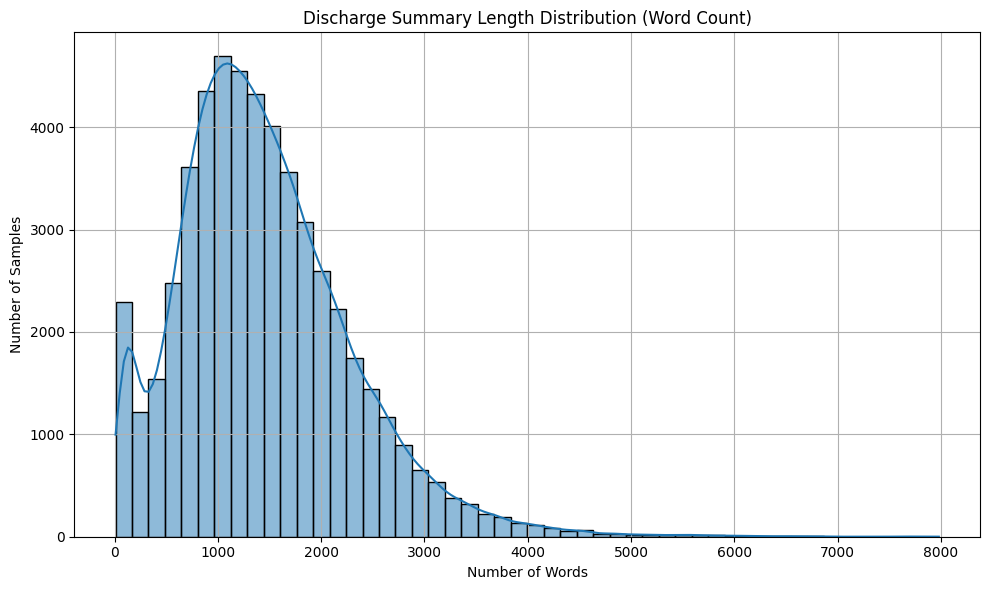

In [44]:
# Discharge Summary Length Distribution
data['text_len'] = data['TEXT'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(data['text_len'], bins=50, kde=True)
plt.title('Discharge Summary Length Distribution (Word Count)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Samples')
plt.grid(True)
plt.tight_layout()
plt.savefig('../plot/Discharge Summary Length Distribution.png')
plt.show()

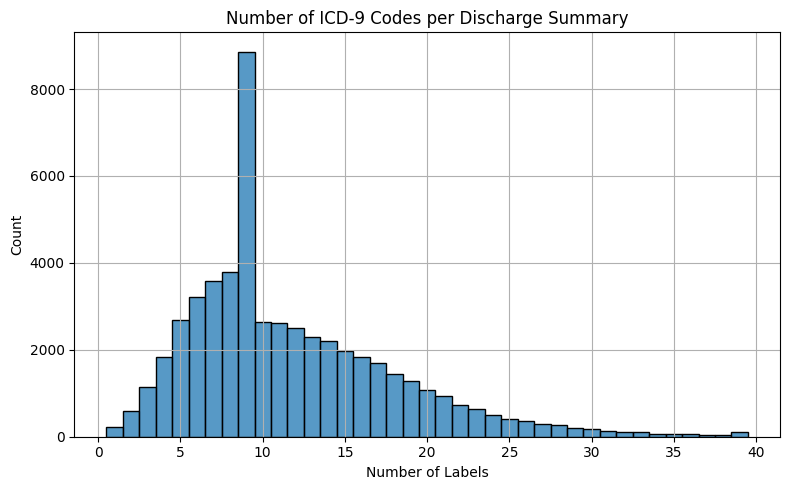

In [46]:
# Number of ICD-9 Codes per Discharge Summary
data['num_labels'] = data['ICD9_CODE'].apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(data['num_labels'], bins=range(1, 20), discrete=True)
plt.title('Number of ICD-9 Codes per Discharge Summary')
plt.xlabel('Number of Labels')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.savefig('../plot/Number of ICD-9 Codes per Discharge Summary.png')
plt.show()


In [28]:
icd_map = pd.read_csv('../data/icd9_map.csv', dtype={'ICD9_CODE': str})
icd_map.head()

,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."
1,01170,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified"
2,01171,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h..."
3,01172,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h..."
4,01173,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou..."


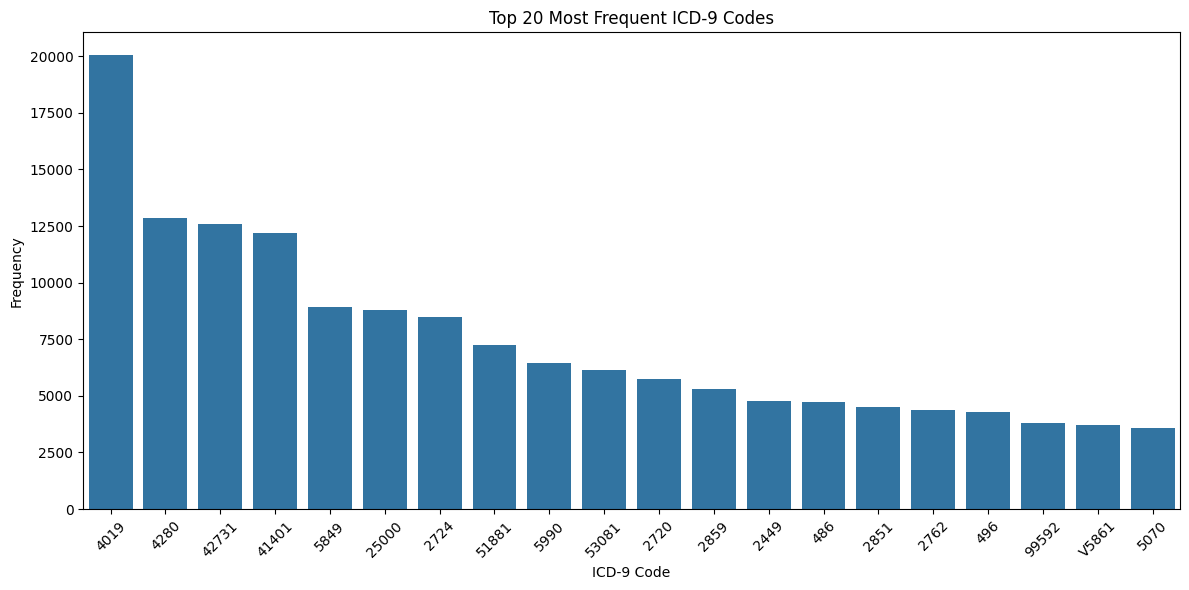

In [48]:
from collections import Counter

label_counter = Counter([label for labels in data['ICD9_CODE'] for label in labels])
top_labels = label_counter.most_common(20)
labels, counts = zip(*top_labels)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(labels), y=list(counts))
plt.title('Top 20 Most Frequent ICD-9 Codes')
plt.ylabel('Frequency')
plt.xlabel('ICD-9 Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../plot/Top 20 Most Frequent ICD-9 Codes.png')
plt.show()


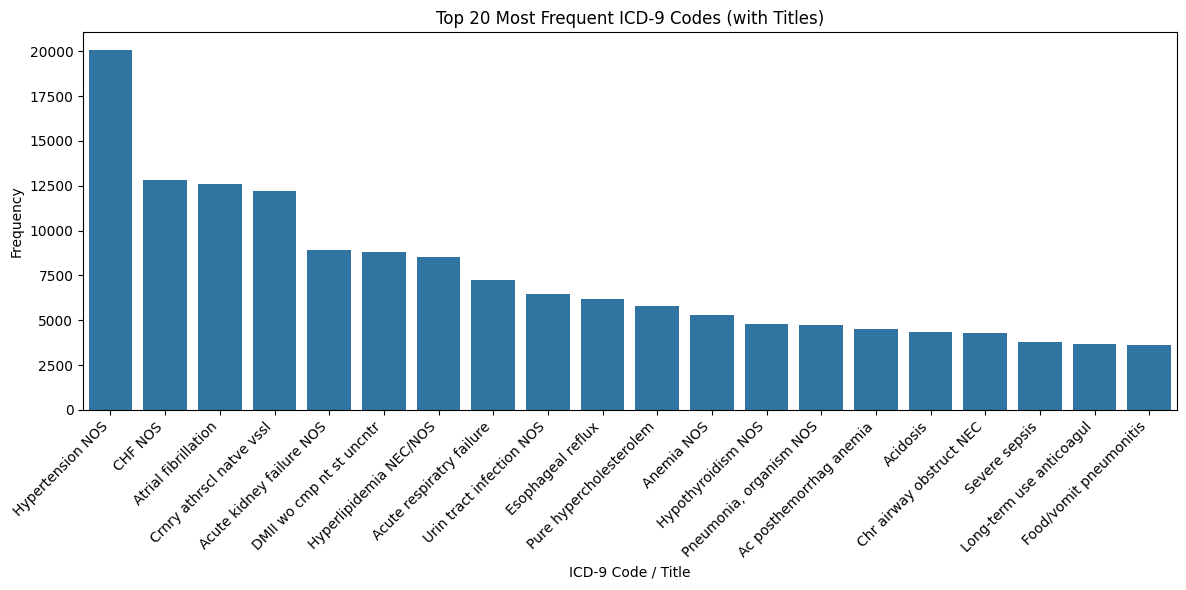

In [50]:
label_counter = Counter([label for labels in data['ICD9_CODE'] for label in labels])
top_labels = label_counter.most_common(20)
codes, counts = zip(*top_labels)

code_title_map = dict(zip(icd_map['ICD9_CODE'], icd_map['SHORT_TITLE']))
titles = [code_title_map.get(code, code) for code in codes]

plt.figure(figsize=(12, 6))
sns.barplot(x=list(titles), y=list(counts))
plt.title('Top 20 Most Frequent ICD-9 Codes (with Titles)')
plt.ylabel('Frequency')
plt.xlabel('ICD-9 Code / Title')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../plot/Top 20 Most Frequent ICD-9 Codes (with Titles).png')
plt.show()


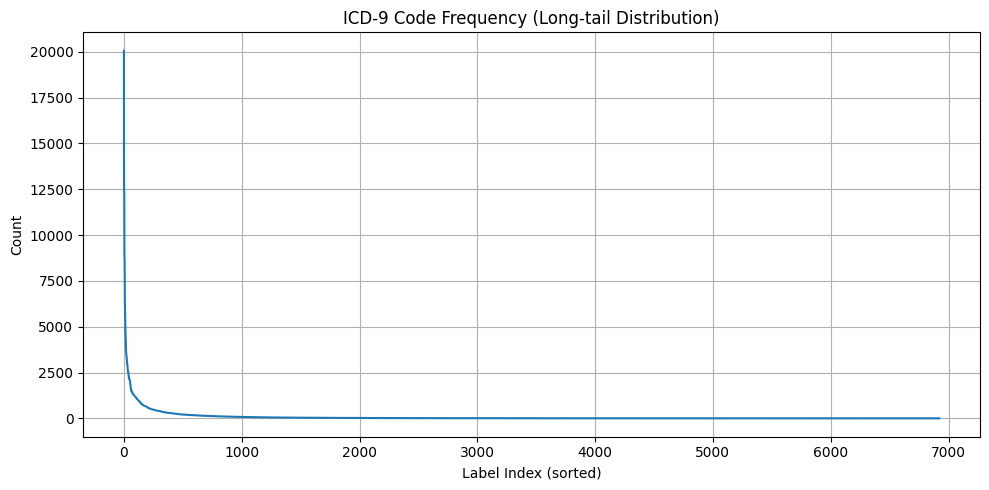

In [52]:
all_counts = sorted(label_counter.values(), reverse=True)
plt.figure(figsize=(10, 5))
plt.plot(all_counts)
plt.title('ICD-9 Code Frequency (Long-tail Distribution)')
plt.ylabel('Count')
plt.xlabel('Label Index (sorted)')
plt.grid(True)
plt.tight_layout()
plt.savefig('../plot/ICD-9 Code Frequency (Long-tail Distribution).png')
plt.show()